# Prédiction de l’Evolution du CoronaVirus (Covid19) par pays et dans le monde par des approches de Machine Learning
## 1 Données

Vous pouvez télécharger les données pour votre projet sur le data.gouv (Cliquez sur lien) .
Information dans les fichiers (csv): Nombre de cas, Nombre de décès, Nombre de guérison, Taux de décès (en pourcentage), Taux de guérison (en pourcentage), Taux d’infection (personnes encore infectées, non décédés ni guéris) (en
pourcentage). Et pour les données par pays, vous trouverez un champ "pays".

## 2 Travail demandé

• Ces données sont utilisées afin d’afficher les tableaux et graphiques sur le site dédié au CoronaVirus (Covid19) de
Politologue.com (lien site). Ecrivez du code python pour générer les mêmes graphiques.

• Créez trois modèles prédictifs avec trois algorithmes d’apprentissage automatique (Random Forest, Artificial Neural
Networks et Support Vector Machines SVM) pour prédire le nombre de cas par pays. Comparez les performances
des trois modèles, quel modèle est le plus adapté pour l’évolution du Covid19 ?

• Utilisez le meilleur classifier des trois pour prédire le nombre de décès, le nombre de guérison, le taux de décès, le
taux de guérison ou le taux d’infection pour un pays donné à une date donnée.

N.B. Vous trouverez plusieurs tutoriaux et codes python sur internet pour les Support Vector Machines (SVM).
C’est une approche très populaire en Machine Learning.

## 3 Soutenance

Le projet sera à traiter en groupes de 2 personnes au plus (les projets soumis par des groupes de 3 personnes ou plus ne
seront pas acceptés). Votre solution devra consister d’un programme écrit en Python. Elle consistera de :
1. un fichier texte nommé README contenant vos noms et indiquant brièvement comment compiler et utiliser votre
programme,
2. Une présentation powerpoint, décrivant ce que vous avez fait, quelles packages vous avez utilisés, et expliquant (ou
justifiant) votre code et les résultats de chaque partie,
3. votre code source.
Votre soumission devra consister d’une seule archive compressée zip.


# I- Générer les mêmes graphes (https://coronavirus.politologue.com/)

## Importation des librairies nécessaires pour afficher les graphes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importer les fichiers contenant les données globales "global.csv"

In [2]:
df = pd.read_csv('global.csv',sep=';',parse_dates=["Date"], dayfirst=True, skiprows=range(7))
# parse_dates et dayfirst: définir la colonne "Date" comme étant une date
#skiprows: ne pas définir les 7 premières lignes dans df

In [3]:
df.head() #afficher les premières lignes
df.columns #identifier les colonnes qui existent
df.info() #informations sur les données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           31 non-null     datetime64[ns]
 1   Infections     31 non-null     int64         
 2   Deces          31 non-null     int64         
 3   Guerisons      31 non-null     int64         
 4   TauxDeces      31 non-null     float64       
 5   TauxGuerison   31 non-null     float64       
 6   TauxInfection  31 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 1.8 KB


## Tracer le nombre d'infections, décès, guérisons en fonction de la date en utlisant une échelle linéaire

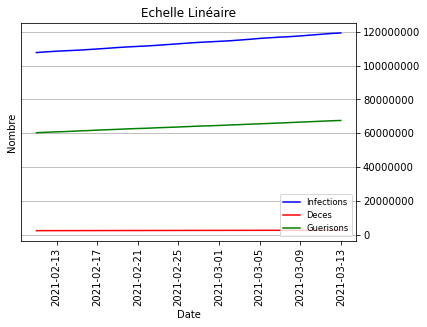

In [4]:
# Définir les axes x et y: x pour la date et y1, y2 et y3 représentent respectivement le nombre d'infections, décès et guérisons
x=df['Date']
y1=df['Infections']
y2=df['Deces']
y3=df['Guerisons']

fig, ax = plt.subplots() # Créer des tracés avec des étiquettes prédéfinies.
ax.yaxis.set_ticks_position("right") #placer l'axe des ordonnées à droite

 #tracer les 3 courbes
plt.plot(x, y1, color='blue', label='Infections')
plt.plot(x, y2, color='red', label='Deces')
plt.plot(x, y3, color='green', label='Guerisons')

legend = ax.legend(loc='lower right', shadow=False, fontsize='small') #ajouter une legende et la mettre à droite en bas

plt.setp(ax.get_xticklabels(), rotation = 90) #rotation des étiquettes d'un angle 90°

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #ne pas définir la notation en exponentielle pour l'axe des y

#Attribuer des noms aux différentes étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre')
plt.title('Echelle Linéaire')

plt.grid(axis='y') #ajouter une grille horizontale

#Définir la taille des axes et étiquettes à 15
Bigger_size=15
plt.rc('font', size=Bigger_size)
plt.rc('axes',titlesize=Bigger_size)
plt.rc('axes',labelsize=Bigger_size)
plt.rc('xtick',labelsize=Bigger_size)
plt.rc('ytick',labelsize=Bigger_size)
plt.rc('figure',titlesize=Bigger_size)


## Tracer le nombre d'infections, décès, guérisons en fonction de la date en utlisant une échelle logarithmique

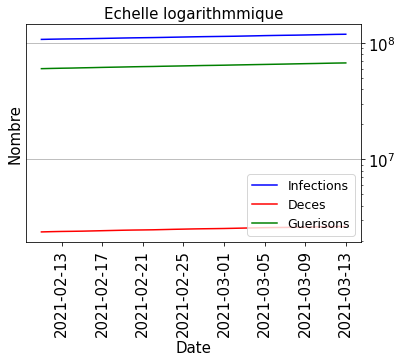

In [5]:
fig, ax = plt.subplots() # Créer des tracés avec des étiquettes prédéfinies.

ax.yaxis.set_ticks_position("right") #placer l'axe des ordonnées à droite

plt.plot(x, y1, color='blue', label='Infections')
plt.plot(x, y2, color='red', label='Deces')
plt.plot(x, y3, color='green', label='Guerisons')

legend = ax.legend(loc='lower right', shadow=False, fontsize='small') #ajouter la légende

#Attribuer des noms aux differentes étiquettes
plt.xlabel('Date')
plt.ylabel('Nombre')
plt.title('Echelle logarithmmique')

plt.grid(axis='y') #ajouter une grille horizontale

plt.setp(ax.get_xticklabels(), rotation = 90) #rotation des étiquettes d'un angle 90°

plt.yscale('log') #ajouter une echelle logarithmique y-axis

#régler la taille des axes et étiquettes à 15
Bigger_size=15
plt.rc('font', size=Bigger_size)
plt.rc('axes',titlesize=Bigger_size)
plt.rc('axes',labelsize=Bigger_size)
plt.rc('xtick',labelsize=Bigger_size)
plt.rc('ytick',labelsize=Bigger_size)
plt.rc('figure',titlesize=Bigger_size)


## Nombre de cas confirmés en fonction de la date (mondialement)

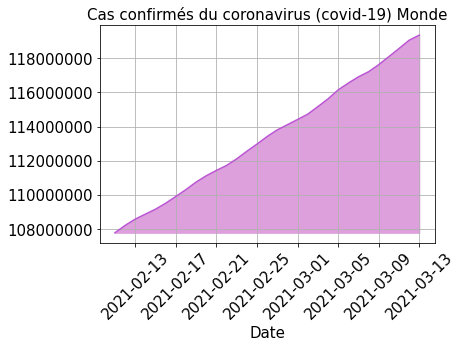

In [6]:
fig, ax = plt.subplots()  # Créer des tracés avec des étiquettes prédéfinies.
plt.plot(x, y1, color='mediumorchid', label='Infections')  #tracer nombre de cas confirmé en fonction de la date

plt.fill_between(x, y1, np.min(y1), color='plum') #remplir la partie au dessous de la courbe

plt.setp(ax.get_xticklabels(), rotation = 45) #rotation des étiquettes d'un angle 45°

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #Eliminer la notation en exponentielle pour l'axe des y

#ajouter des noms aux différentes étiquettes
plt.xlabel('Date')
plt.title('Cas confirmés du coronavirus (covid-19) Monde')

plt.grid() #ajouter des grilles

## Nombre de décès en fonction de la date (mondialement)

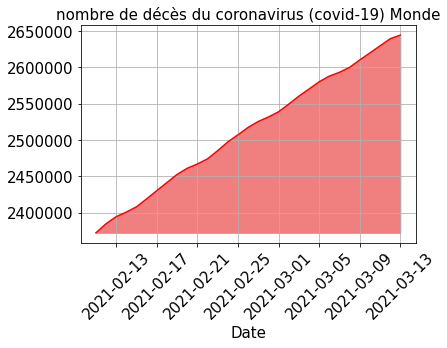

In [7]:
fig, ax = plt.subplots() # Créer des tracés avec des étiquettes prédéfinies.
plt.plot(x, y2, color='red', label='Deces') #tracer nombre de décès en fonction de la date

plt.fill_between(x, y2, np.min(y2), color='lightcoral') #remplir la partie au dessous de la courbe par la couleur rouge

plt.setp(ax.get_xticklabels(), rotation = 45) #rotation des étiquettes d'un angle 45°

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #Eliminer la notation en exponentielle pour l'axe des y

#ajouter des noms aux différentes étiquettes
plt.xlabel('Date')
plt.title('nombre de décès du coronavirus (covid-19) Monde')

plt.grid() #ajouter des grilles

## Nombre de guérisons en fonction de la date (mondialement)

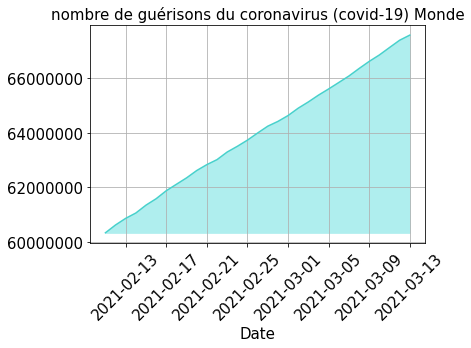

In [8]:
fig, ax = plt.subplots() # Créer des tracés avec des étiquettes prédéfinies.
plt.plot(x, y3, color='mediumturquoise', label='Guerisons') #Tracer nombre de Guérisons en fonction de la date

plt.fill_between(x, y3, np.min(y3), color='paleturquoise') #remplir la partie au dessous de la courbe par la couleur bleue

plt.setp(ax.get_xticklabels(), rotation = 45) #rotation des étiquettes d'un angle 45°

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #Eliminer la notation en exponentielle pour l'axe des y

#ajouter des noms aux différentes étiquettes
plt.xlabel('Date')
plt.title('nombre de guérisons du coronavirus (covid-19) Monde')

plt.grid() #ajouter des grilles

## Taux d'infections en fonction de la date (mondialement)

In [9]:
# Définir les axes y4,y5 et y6: taux d'infections, taux de décès et taux de guérisons
y4=df['TauxInfection']
y6=df['TauxDeces']
y5=df['TauxGuerison']

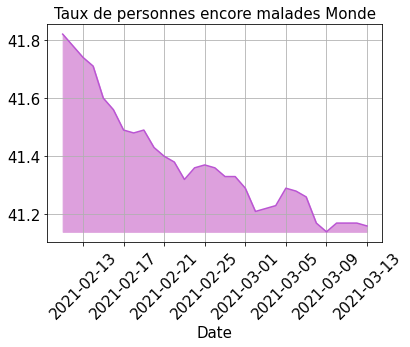

In [10]:
fig, ax = plt.subplots() # Créer des tracés avec des étiquettes prédéfinies.

plt.plot(x, y4, color='mediumorchid', label='TauxInfection')  #Tracer taux d'infections en fonction de la date

plt.fill_between(x, y4, np.min(y4), color='plum') #remplir la partie au dessous de la courbe par la couleur verte

plt.setp(ax.get_xticklabels(), rotation = 45) #rotation des étiquettes d'un angle 45°

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #Eliminer la notation en exponentielle pour l'axe des y

#ajouter des noms aux différentes étiquettes
plt.xlabel('Date')
plt.title('Taux de personnes encore malades Monde')

plt.grid() #ajouter des grilles

## Taux de décès en fonction de la date (mondialement)

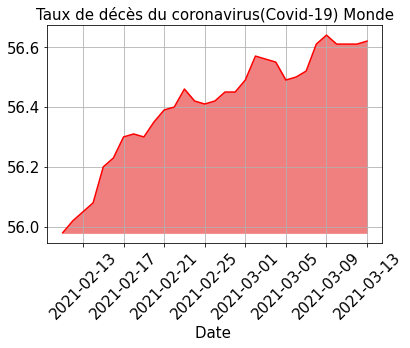

In [11]:
fig, ax = plt.subplots() # Créer des tracés avec des étiquettes prédéfinies.

plt.plot(x, y5, color='red', label='TauxDeces') #Tracer taux de décès en fonction de la date

plt.fill_between(x, y5, np.min(y5), color='lightcoral') #remplir la partie au dessous de la courbe par la couleur rouge

plt.setp(ax.get_xticklabels(), rotation = 45) #rotation des étiquettes d'un angle 45°

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #Eliminer la notation en exponentielle pour l'axe des y

#ajouter des noms aux differentes étiquettes
plt.xlabel('Date ')
plt.title('Taux de décès du coronavirus(Covid-19) Monde')

plt.grid() #ajouter des grilles

## Taux de guérison en fonction de la date (mondialement)

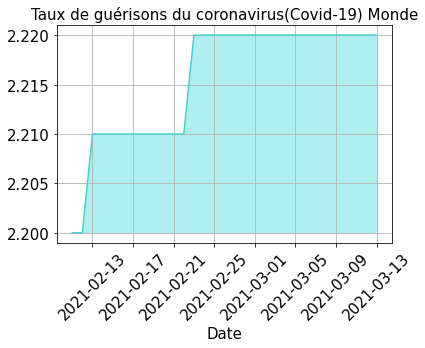

In [12]:
fig, ax = plt.subplots() # Créer des tracés avec des étiquettes prédéfinies.

plt.plot(x, y6, color='mediumturquoise', label='TauxGuerison')  #Tracer taux de Guérison en fonction de la date

plt.fill_between(x, y6, np.min(y6), color='paleturquoise') #remplir la partie au dessous de la courbe par la couleur bleue

plt.setp(ax.get_xticklabels(), rotation = 45) #rotation des étiquettes d'un angle 45°

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) #Eliminer la notation en exponentielle pour l'axe des y

#ajouter des noms aux differentes étiquettes
plt.xlabel('Date')
plt.title('Taux de guérisons du coronavirus(Covid-19) Monde')

plt.grid() #ajouter des grilles

# II- Détails de l'évolution du coronavirus par pays


# Préparation des données

In [48]:
import pandas as pd
df = pd.read_csv('pays.csv',sep=';',parse_dates=["Date"], dayfirst=True, skiprows=range(7)) # ne pas lire les 7 premieres lignes du fichier pays.csv
df.head() #afficher les premières lignes du fichier

,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
0,2021-03-13,Andorre,11228,112,10775,1.00,95.97,3.04
1,2021-03-13,Émirats Arabes Unis,424405,1388,403478,0.33,95.07,4.60
2,2021-03-13,Afghanistan,55959,2454,49471,4.39,88.41,7.21
3,2021-03-13,Antigua-et-Barbuda,962,27,592,2.81,61.54,35.65
4,2021-03-13,Albanie,116821,2030,79821,1.74,68.33,29.93


# Encoder les colonnes Date et Pays en des entiers

In [52]:
df.describe(include="all")

<ipython-input-52-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,Date,Pays,Infections,Deces,Guerisons,TauxDeces,TauxGuerison,TauxInfection
count,6293,6293,6.293000e+03,6293.000000,6.293000e+03,6293.000000,6293.000000,6293.000000
unique,31,203,NaN,NaN,NaN,NaN,NaN,NaN
top,2021-02-28 00:00:00,Liechtenstein,NaN,NaN,NaN,NaN,NaN,NaN
freq,203,31,NaN,NaN,NaN,NaN,NaN,NaN
first,2021-02-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-03-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,5.586785e+05,12378.321786,3.151613e+05,1.935218,79.487945,18.576901
std,NaN,NaN,2.325977e+06,45658.307298,1.094640e+06,2.253285,24.505033,24.458586
min,NaN,NaN,1.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,-0.190000
25%,NaN,NaN,6.045000e+03,83.000000,3.359000e+03,0.930000,77.220000,3.810000


### Transformer la colonne date en des entiers

In [14]:
df['Date']=df['Date'].dt.strftime("%Y%m%d").astype(int)
print(df['Date']) #afficher la colonne date

0       20210313
1       20210313
2       20210313
3       20210313
4       20210313
          ...   
6288    20210211
6289    20210211
6290    20210211
6291    20210211
6292    20210211
Name: Date, Length: 6293, dtype: int32


In [15]:
print(df.dtypes) # afficher le type de chaque colonne

Date               int32
Pays              object
Infections         int64
Deces              int64
Guerisons          int64
TauxDeces        float64
TauxGuerison     float64
TauxInfection    float64
dtype: object


### Transformer la colonne Pays en des entiers

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pays = le.fit_transform(df['Pays']) # transformer la colonne Pays (chaîne de caractères) en un entier
df["Pays"] = pd.Series(pays)
#print(df.dtypes) # afficher le type de chaque colonne
#df['Pays'].head() # afficher les premières lignes de la colonne Pays

## Définir les features et le target

In [17]:
X = df[['Date','Pays']]
y = df['Infections']

## Définir les données d'entrainement 80% et les données de test 20%

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Méthode Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train) # Entrainer le modèle avec les données d'entrainement
y_pred = model.fit(X_train, y_train).predict(X_test)

## Déterminer les performances de la méthode RandomForest
 ### - MAE : Mean Asolute Error
###   - MAPE : Mean Absolute Percentage Error 

In [20]:
import numpy as np
erreurs = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Error: 2448.37
Mean Absolute Percentage Error : 0.76 %.


## Méthode Support Vector Machines SVM

In [21]:
X = df[['Date','Pays']]
y = df['Infections']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) #Définir les données d'entrainement 80% et les données de test 20%

In [22]:
from sklearn.svm import SVR
model = SVR()

In [23]:
model.fit(X_train, y_train)

SVR()

## Déterminer les performances de la méthode SVM
 ### - MAE : Mean Asolute Error
###   - MAPE : Mean Absolute Percentage Error 

In [24]:
y_pred = model.fit(X_train, y_train).predict(X_test)
#On va calculer plusieurs erreurs entre la valeur prédite y_pred et y_test:
# MAE 
erreurs = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Error: 679984.14
Mean Absolute Percentage Error : 24638.09 %.


## Effet de la constante C (C=50 et C=1):

In [25]:
model_C = SVR(C=50)
model_C.fit(X_train, y_train)
y_pred = model.fit(X_train, y_train).predict(X_test)
#MAE
erreurs = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Error: 679984.14
Mean Absolute Percentage Error : 24638.09 %.


In [26]:
model_C = SVR(C=1)
model_C.fit(X_train, y_train)
y_pred = model.fit(X_train, y_train).predict(X_test)
# MAE
erreurs = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Error: 679984.14
Mean Absolute Percentage Error : 24638.09 %.


## Artificial neural network

In [27]:
X = df[['Date','Pays']]
y = df['Infections']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) #Définir les données d'entrainement 80% et les données de test 20%

## Construire l'algorithme de régression

In [28]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=100, activation='relu')
mlp

MLPRegressor(max_iter=100)

In [29]:
mlp.fit(X_train,y_train) #entrainer le modele
y_pred = mlp.predict(X_test) # prédire la valeur de y_pred à partir du modèle construit

## Déterminer les performances de la méthode Artifical neural networks
 ### - MAE : Mean Asolute Error
###   - MAPE : Mean Absolute Percentage Error 

In [30]:
#MAE
erreurs = abs(y_pred - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Error: 645565.07
Mean Absolute Percentage Error : 331564.93 %.


### En comparant les performances de 3 méthodes, on constate que Random Forest est le plus performant

# III-  Utilisez le meilleur classifier des trois pour prédire le nombre de décès, le nombre de guérison, le taux de décès, le taux de guérison ou le taux d’infection pour un pays donné à une date donnée.

### Dans cette partie, on utlisera le classifier Random Forest pour prévoir le nombre de décès, le nombre de guérison, le taux de décès, le taux de guérison et le taux d'infection

### a- Prévoir le nombre de décès

#### Définir les features et le target

In [31]:
X = df[['Date','Pays']]
y = df['Deces']

## Définir les données d'enrtrainement et les données tests:

In [32]:
from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X,y,test_size=0.2)

## Construire le modèle de regression avec la méthode Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor
model_deces = RandomForestRegressor()
model_random_deces=model_deces.fit(X_train_d, y_train_d) # Entrainer le modèle avec les données d'entrainement
y_pred = model_random_deces.predict(X_test_d)

print(X_test_d,y_pred)

          Date  Pays
6118  20210211    20
5846  20210213   162
5223  20210216    52
2205  20210303   178
6209  20210211    22
...        ...   ...
3264  20210225    28
5656  20210214    31
2879  20210227    38
5603  20210214    75
4058  20210222   195

[1259 rows x 2 columns] [3.13008500e+02 2.90000000e+01 6.57476985e+04 ... 4.63600000e+03
 1.36581527e+04 1.10972010e+03]


In [34]:
# Test de prédiction du nombre de décès
X_random=[[20210511,105]]
y_pred = model_random_deces.predict(X_random)
print("pour la date et le pays:", X_random, "il y a ", int(y_pred) , "deces")

pour la date et le pays: [[20210511, 105]] il y a  1078 deces


### b- Prévoir le nombre de guérison

#### Définir les features et le target

In [35]:
X = df[['Date','Pays']]
y = df['Guerisons']

In [36]:
from sklearn.model_selection import train_test_split
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(X,y,test_size=0.2)

## Construire le modèle de regression avec la méthode Random Forest

In [37]:
from sklearn.ensemble import RandomForestRegressor
model_gueris = RandomForestRegressor()
model_random_gueris=model_gueris.fit(X_train_g, y_train_g) # Entrainer le modèle avec les données d'entrainement
y_pred = model_random_gueris.predict(X_test_g)

print(X_test_g,y_pred)

          Date  Pays
1634  20210305    14
3459  20210224   190
4362  20210220   168
5088  20210216   130
2718  20210228   112
...        ...   ...
5352  20210215    69
2112  20210303    82
6257  20210211   174
563   20210311     8
2751  20210228    85

[1259 rows x 2 columns] [229229.88257143   1767.60661905  73571.2185     ...  25133.02171429
 372222.98235714 403042.75885714]


In [38]:
# Test de prédiction du nombre de guerisons
X_random=[[20210511,105]]
y_pred = model_random_gueris.predict(X_random)
print("pour la date et le pays:", X_random, "il y a ", int(y_pred) , "gueris")

pour la date et le pays: [[20210511, 105]] il y a  25242 gueris


### c- Prévoir le taux de décès

#### Définir les features et le target

In [39]:
X = df[['Date','Pays']]
y = df['TauxDeces']

In [40]:
from sklearn.model_selection import train_test_split
X_train_td, X_test_td, y_train_td, y_test_td = train_test_split(X,y,test_size=0.2)

## Construire le modèle de regression avec la méthode Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
model_tdeces = RandomForestRegressor()
model_random_tdeces=model_tdeces.fit(X_train_td, y_train_td) # Entrainer le modèle avec les données d'entrainement
y_pred = model_random_tdeces.predict(X_test_td)

print(X_test_td,y_pred)

          Date  Pays
2724  20210228   102
5220  20210216    55
163   20210313   164
3154  20210226    33
51    20210313    53
...        ...   ...
5559  20210214   108
1791  20210305   174
5168  20210216    96
229   20210312   181
831   20210309    32

[1259 rows x 2 columns] [3.05542857 3.57       1.98426667 ... 1.598      1.177415   1.25747714]


In [42]:
# Test de prédiction du taux de décès
X_random=[[20210511,105]]
y_pred = model_random_tdeces.predict(X_random)
print("pour la date et le pays:", X_random, "il y a ", int(y_pred) , " % taux de deces")

pour la date et le pays: [[20210511, 105]] il y a  3  % taux de deces


### d- Prévoir le taux de guerison

#### Définir les features et le target

In [43]:
X = df[['Date','Pays']]
y = df['TauxGuerison']

In [44]:
from sklearn.model_selection import train_test_split
X_train_tg, X_test_tg, y_train_tg, y_test_tg = train_test_split(X,y,test_size=0.2)

## Construire le modèle de regression avec la méthode Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
model_tgueris = RandomForestRegressor()
model_random_tgueris=model_tgueris.fit(X_train_tg, y_train_tg) # Entrainer le modèle avec les données d'entrainement
y_pred = model_random_tgueris.predict(X_test_tg)

print(X_test_tg,y_pred)

          Date  Pays
2992  20210227   135
775   20210310    34
1915  20210304   153
3251  20210225     0
997   20210309   185
...        ...   ...
2762  20210228    75
4084  20210221    15
2829  20210228    18
4828  20210218   150
4574  20210219    94

[1259 rows x 2 columns] [83.62283333 89.9879     89.1748     ... 76.25483333 88.9472031
 86.093705  ]


In [46]:
# Test de prédiction du nombre de guerisons
X_random=[[20210511,105]]
y_pred = model_random_tgueris.predict(X_random)
print("pour la date et le pays:", X_random, "il y a ", int(y_pred) , "% taux de guerison")

pour la date et le pays: [[20210511, 105]] il y a  76 % taux de guerison


## Autre méthode: l'utlisateur pourra choisir la date et le code du pays:

In [47]:
date=input("donner une date: ")
c1=input ("donner le code du pays: ")
X_random=[[date,c1]]
y_pred = model_random_deces.predict(X_random)
print("Pour la date", date, "au pays", c1, "il y a ", int(y_pred) , "deces")

donner une date: 20210601
donner le code du pays: 21
Pour la date 20210601 au pays 21 il y a  1 deces
